<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/entrenamientoDiccionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import math as m
from matplotlib import pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras

In [20]:
y=[]
X=np.empty((0,288*432), int)
X1=np.empty((0,288*432), int)
for punt in range(0,147):
  if punt < 147:
    directorio="L%d.jpg" % (punt+1)
    a=cv2.imread(directorio)
    rgB=np.matrix(a[:,:,0])
    vector=np.reshape(rgB,(1,288*432))
    X=np.append(X,vector,axis=0)
print(X.shape)
y1 = [8,9,21,13,4,4,9,8,23,16,4,20,21,11,18,23,13,19,22,15,23,26,17,11,3,11,2,21,2,9,13,3,2,9,2,11,8,9,4,3,9,21,21,11,3,6,3,9,9,11,2,9,11,9,16,4,4,11,11,3,4,4,11,3,13,23,2,26,4,13,18,22,26,21,16,24,12,4,18,22,23,18,4,4,7,23,19,23,18,18,2,23,16,12,16,9,21,21,10,11,14,6,4,2,20,5,11,1,19,26,17,11,14,19,19,14,12,16,16,11,12,15,22,18,21,14,13,1,15,14,15,2,21,12,20,19,24,13,15,26,3,16,8,11,9,17,23]
yy = np.array(y1)
print(yy.shape)

(147, 124416)
(147,)


In [4]:
vector.shape

(1, 124416)

In [0]:
from sklearn.datasets import *
import numpy as np
from IPython.display import Image
import pandas as pd
from sklearn.metrics import *

In [0]:
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))

In [7]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import train_test_split
#est = GaussianNB()
#Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.5)
#print(yts.shape)
#print(Xts.shape)

(35,)
(35, 124416)


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
s = cross_val_score(est, X, yy, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s)
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.93333333 0.86666667 0.86666667 0.93333333 0.86666667 0.73333333
 0.73333333 1.         1.         1.        ]
accuracy 0.893 (+/- 0.09522)


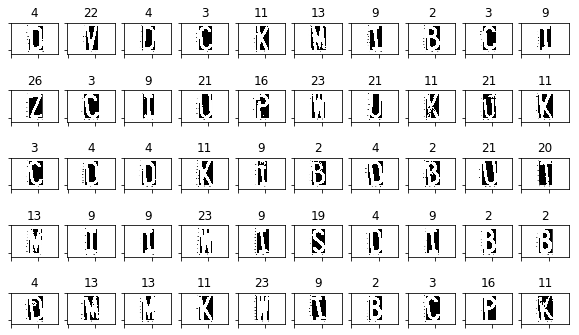

In [23]:
perm = np.random.permutation(range(Xts.shape[0]))[0:50]
#print X.shape[0]
#print perm
random_imgs   = Xts[perm]
random_labels = yts[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title((random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

[ 8  9 21 13  4  4  9  8 23 16  4 20 21 11 18 23 13 19 22 15 23 26 17 11
  3 11  2 21  2  9 13  3  2  9  2 11  8  9  4  3  9 21 21 11  3  6  3  9
  9 11  2  9 11  9 16  4  4 11 11  3  4  4 11  3 13 23  2 26  4 13 18 22
 26 21 16 24 12  4 18 22 23 18  4  4  7 23 19 23 18 18  2 23 16 12 16  9
 21 21 10 11 14  6  4  2 20  5 11  1 19 26 17 11 14 19 19 14 12 16 16 11
 12 15 22 18 21 14 13  1 15 14 15  2 21 12 20 19 24 13 15 26  3 16  8 11
  9 17 23]


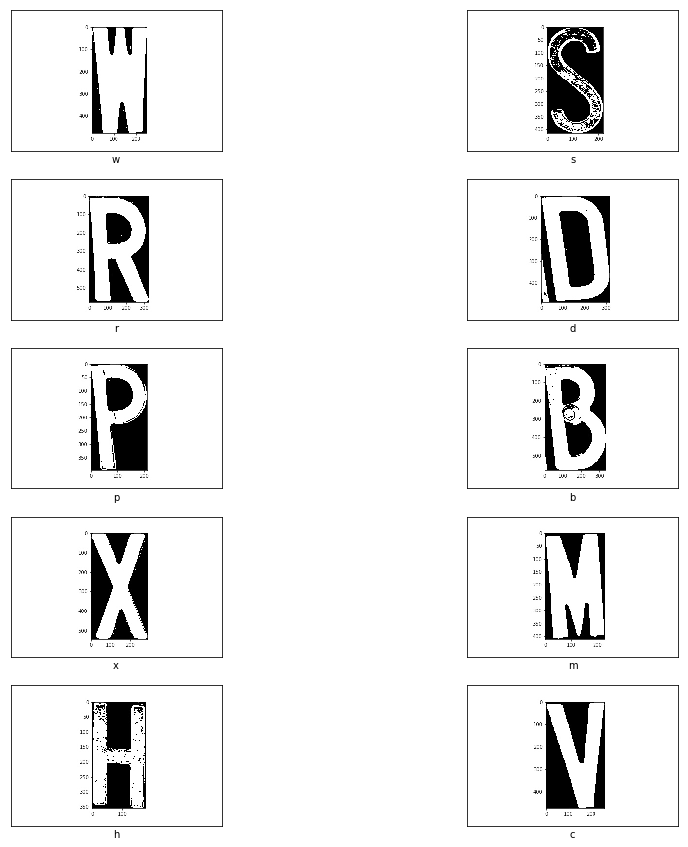

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
est = GaussianNB()
est.fit(X,yy)
predictions = est.predict(X)
print(predictions)
Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.8)
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' ,'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xts[i].reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
    plt.xlabel(class_names[yts[i]-1])
    
aa=cv2.imread("L80.jpg")
rggB=np.matrix(aa[:,:,0])
vectorr=np.reshape(rggB,(1,288*432))
plt.imshow(vectorr.reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)

In [0]:
Xts.shape

(56, 124416)

In [0]:
Xts.reshape([56,288,432])

ValueError: ignored

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[288, 432, 1]),
    keras.layers.Dense(7488, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

W0818 21:44:53.928961 140194458535808 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 124416)            0         
_________________________________________________________________
dense (Dense)                (None, 7488)              931634496 
_________________________________________________________________
dense_1 (Dense)              (None, 26)                194714    
Total params: 931,829,210
Trainable params: 931,829,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(Xts, yts, epochs=5)

ValueError: ignored

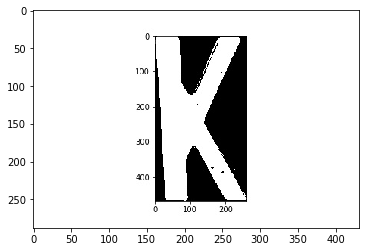

In [0]:
img = cv2.imread("L63.jpg")
predictions
#plt.imshow(Xts[10].reshape(288,431),cmap='Greys')
plt.imshow(img)#.reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
#pred = model.predict(x_test[image_index].reshape(1, 288, 431, 1))
#print("the number predicted is: ", pred.argmax())